# <u>Avocado Price Prediction Analysis Using ML </u>

## Table of Contents

* [Problem Statement](#section1)<br>
* [Data Description](#section2)
* [Importing Packages](#section3)<br/>
* [Understanding the Avocado Dataset](#section4)<br/>
    - * [Data Types and Dimensions](#Data_Types)<br/>
    - * [Statistical Summary](#Statistical_Summary)<br/>
    - * [Checking for Missing Values](#Checking_for_Missing_Values)
    - * [Outliears Discovery](#outliers_discovery)
    
* [Questions answered using EDS](#section7)<br/>
    - * [Q.1 Which type of Avocados are more in demand (Conventional or Organic)?](#section8)<br/>
    - * [Q.2 In which range Average price lies, what is distribution look like?](#section9)<br/>
    - * [Q.3 How Average price is distributed over the months for Conventional and Organic Types?](#section10)<br/>
    - * [Q.4 What are TOP 5 regions where Average price are very high?](#section11)<br/>
    - * [Q.5 What are TOP 5 regions where Average consumption is very high?](#section12)<br/>
    - * [Q.6 How dataset features are correlated with each other?](#section13)<br/>
* [Data Preprocessing](#Data_Preprocessing)<br/>
* [Linear Regression(OLS)](#section18)<br/>
* [Linear regression using SGD](#section19)<br/>
* [Random Forest](#section20)<br/>
* [Conclusions](#section22)<br/>  

### * Problem Statement

The objective of the dataset is to predict the price of avocados depending on sales volume of avocados, number of small, medium and large bags sold in different regions from year 2015 to 2018. 

### * Data Description

- The dataset comprises of __18249 observations of 14 columns__.

- The unclear variables terminology is explained below showing names of the columns and their description :

<table>
<tr><th>Features</th><th>Description</th></tr>
<tr><td>‘Unnamed: 0’</td><td>Redundant index feature that will be removed later</td></tr>
<tr><td>‘Total Volume’</td><td>Total sales volume of avocados</td></tr>
<tr><td>‘4046’</td><td>Total sales volume of  Small/Medium Hass Avocado</td></tr>
<tr><td>‘4225’</td><td>Total sales volume of Large Hass Avocado</td></tr>
<tr><td>‘4770’</td><td>Total sales volume of Extra Large Hass Avocado</td></tr>
<tr><td>‘Total Bags’</td><td>Total number of Bags sold</td></tr>
<tr><td>‘Small Bags’</td><td>Total number of Small Bags sold</td></tr>
<tr><td>‘Large Bags’</td><td>Total number of Large Bags sold</td></tr>
<tr><td>‘XLarge Bags’</td><td>Total number of XLarge Bags sold</td></tr>
</table>

### * Importing packages

In [1]:
import pandas as pd
import matplotlib
matplotlib.use("Agg", force=True)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

### * Data Extraction

In [4]:
import requests # Request is an HTTP library

In [5]:
filename = "D:/Linear regression avocado price prediction/avocado1.csv" 

In [6]:
link = 'https://raw.githubusercontent.com/tkickgun/Avacado_Price/main/Avocado_Price_Prediction_Avocado.csv'

data = requests.get(link)  


with open(filename, 'wb') as f:
    f.write(data.content)  
f.close()

In [2]:
df = pd.read_csv("D:/Linear regression avocado price prediction/avocado1.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### * Understanding the Avocado Dataset

In [3]:
df.shape # It will give the number of rows and columns

(18249, 14)

In [4]:
df.columns  # This will print the names of all columns.

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.head()  # Will give you first 5 records

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
# Use include='all' option to generate descriptive statistics for all columns
# You can get idea about which column has missing values using this
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


- We can see all columns having count __18249__. Looks like it doesn't contain missing values

In [8]:
df = df.drop(['Unnamed: 0'], axis= 1) # Dropping columns

In [9]:
df.isnull().sum()  # Will show you null count for each column, but will not count Zeros(0) as null

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- We can see that __no missing values__ exist in dataset

### * Outliers Discovery

In [10]:
df.select_dtypes(exclude='object').columns[1:]

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')

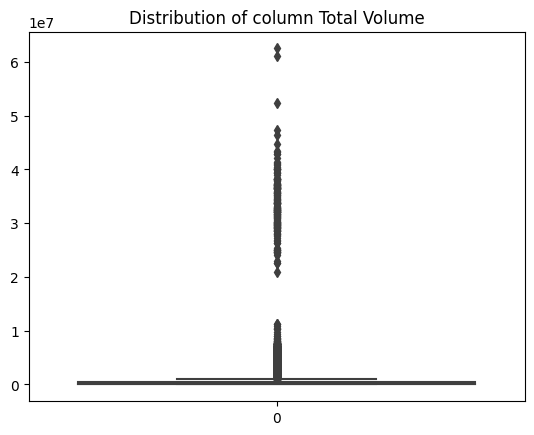

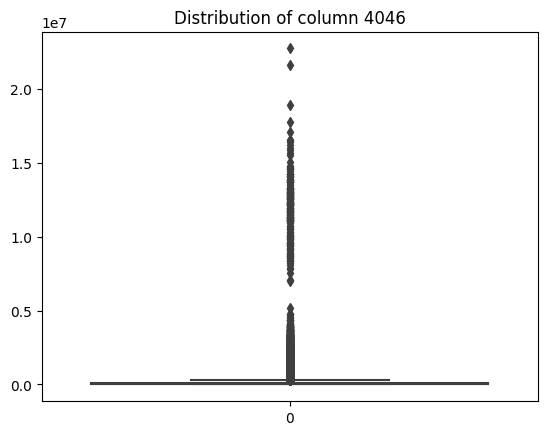

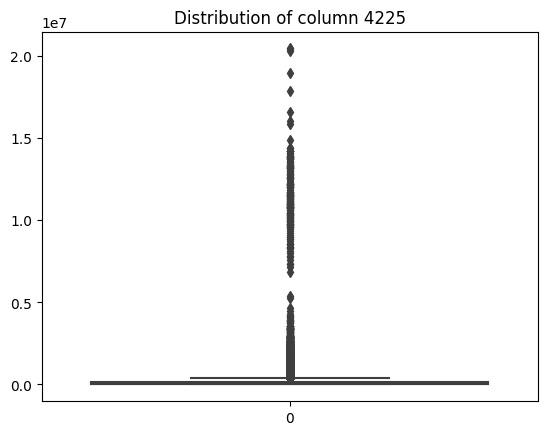

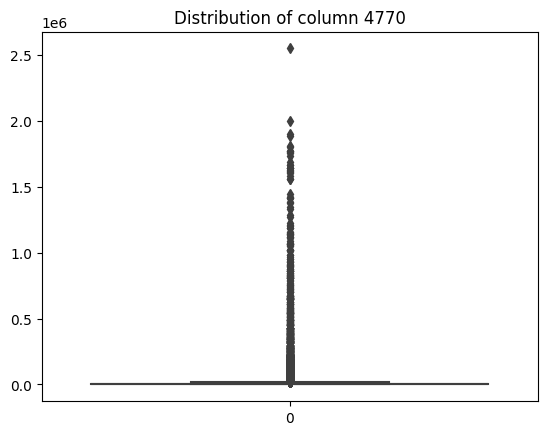

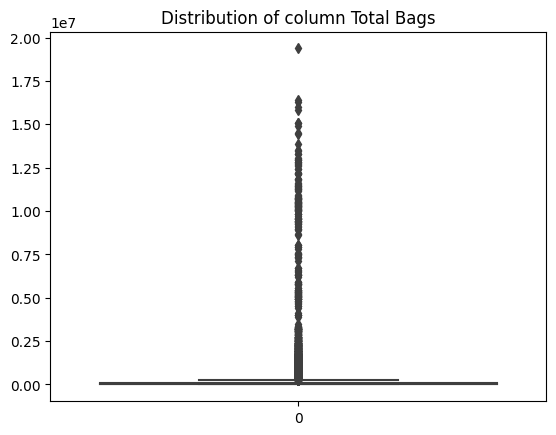

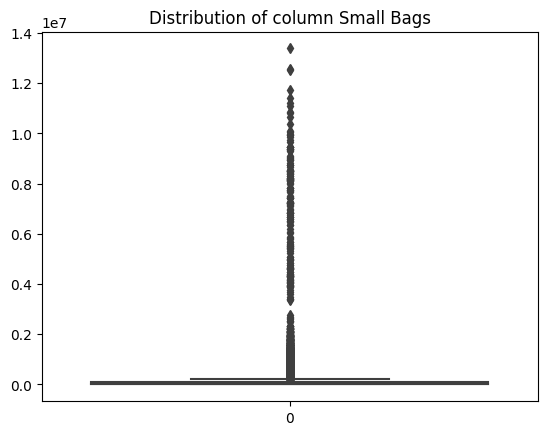

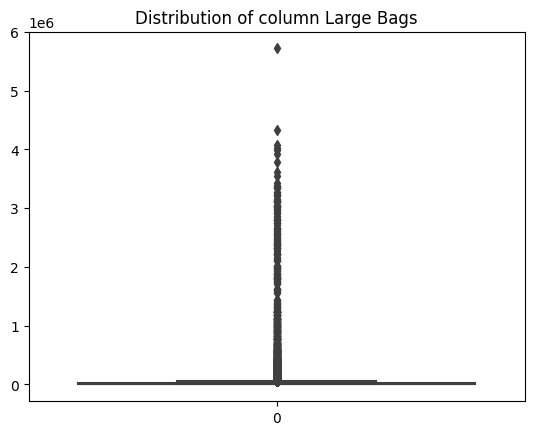

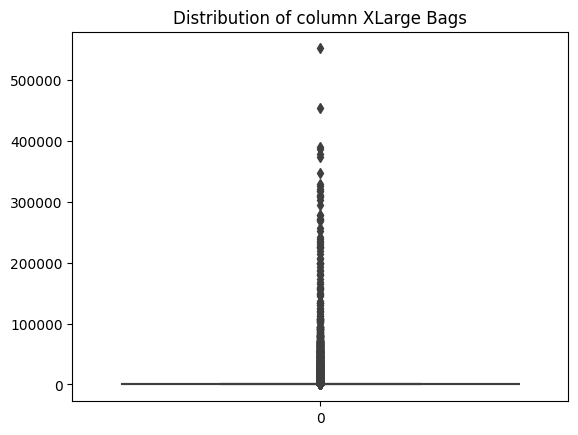

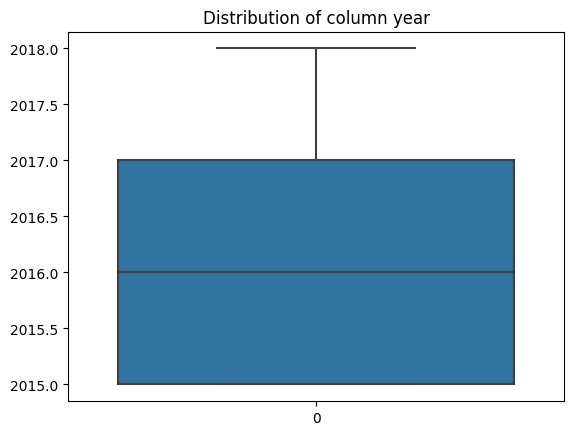

In [11]:
for i in df.select_dtypes(exclude='object').columns[1:]:
    sns.boxplot(df[i])
    plt.title('Distribution of column {}'.format(i))
    plt.show()

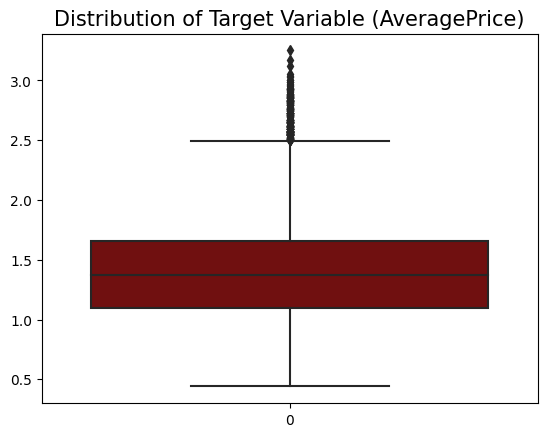

In [12]:
sns.boxplot(df['AveragePrice'], color='maroon')

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (AveragePrice)', fontsize = 15)

# display the plot
plt.show()

- We observe outliers present in the target variable.

**Extracting month and year from date and then dropping date feature from the dataset**

In [13]:
df['year'] = pd.DatetimeIndex(df['Date']).year 
df['month'] = pd.DatetimeIndex(df['Date']).month

In [14]:
df = df.drop(['Date'], axis= 1)

In [15]:
df.sample(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
12448,1.30,11109.10,335.93,6835.59,0.00,3937.58,166.67,3770.91,0.0,organic,2016,CincinnatiDayton,1
17817,1.31,36999.72,8247.81,67.33,0.00,28684.58,28094.58,590.00,0.0,organic,2018,Houston,3
7751,1.61,354589.37,124583.84,189307.81,912.40,39785.32,39044.80,587.02,153.5,conventional,2017,Sacramento,9
393,1.15,199980.30,43524.21,45226.73,38578.80,72650.56,69123.57,3526.99,0.0,conventional,2015,Charlotte,6
547,0.99,164161.25,67311.23,40382.51,24529.19,31938.32,24969.38,4739.34,2229.6,conventional,2015,Columbus,6



### * Data Visualisation and Questions answered


- __Q.1 Which type of Avocados are more in demand (Conventional or Organic)?__

In [16]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [17]:
df.groupby('type')

In [18]:
df.groupby('type').agg('sum')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month
type,,,,,,,,,,,
conventional,10568.27,1.508722e+10,5.280410e+09,5.245673e+09,4.143733e+08,4.146764e+09,3.164183e+09,9.259030e+08,56678255.60,18399366,56376
organic,15089.43,4.361817e+08,6.670082e+07,1.406024e+08,2.429041e+06,2.264115e+08,1.606877e+08,6.571281e+07,10921.73,18393317,56352


In [19]:
df.groupby('type').agg('sum')['Total Volume']

type
conventional    1.508722e+10
organic         4.361817e+08
Name: Total Volume, dtype: float64

In [20]:
Type = df.groupby('type').agg('sum')['Total Volume']
Type

type
conventional    1.508722e+10
organic         4.361817e+08
Name: Total Volume, dtype: float64

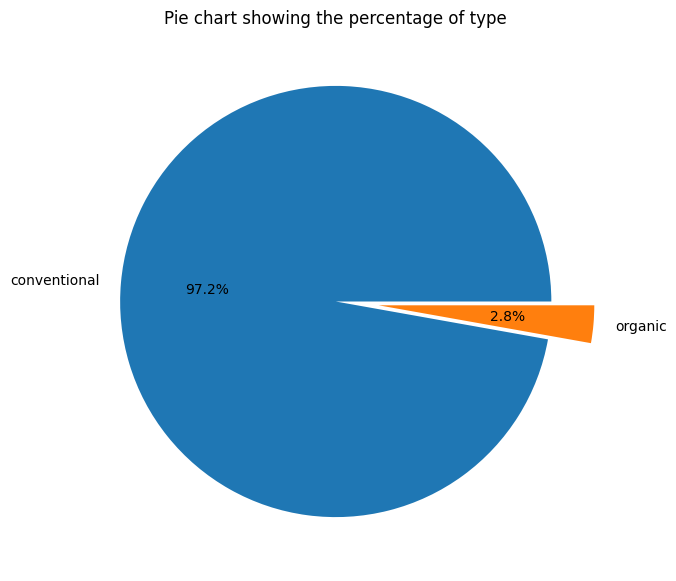

In [21]:
plt.figure(figsize=(7,7))
plt.pie(Type,explode= [0,0.2],labels=Type.index,autopct='%1.1f%%')
plt.title('Pie chart showing the percentage of type')
plt.show()

- 2.8% of dataset is organic and 97.2% is conventional.This shows Conventional has more demand. 

<a id=section9></a>

- __Q.2 In which range Average price lies, how the distribution looks like?__

<AxesSubplot: xlabel='AveragePrice'>

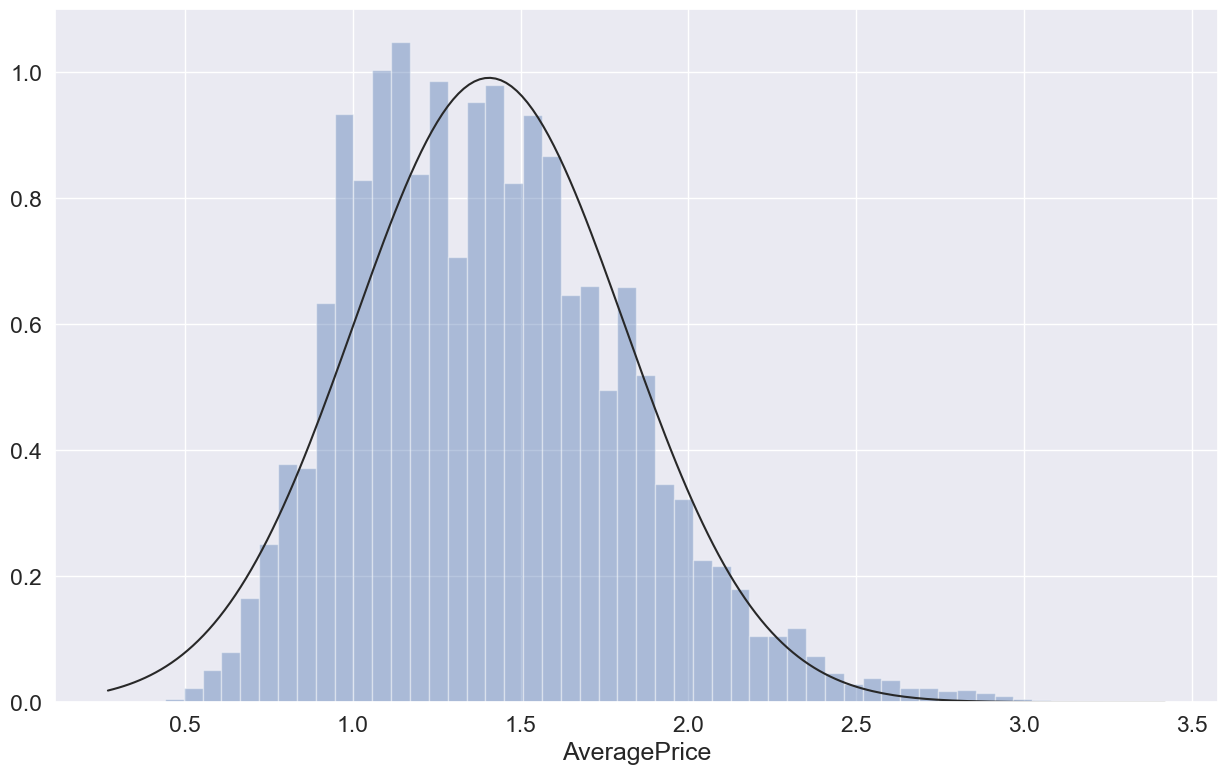

In [22]:
sns.set(font_scale=1.5) 
from scipy.stats import norm # Imports normal distribution function from scipy library
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice,kde=False,fit=norm)

- Average Price distribution shows that for most cases __price of avocado is between 1.1 and 1.6.__

<a id=section10></a>

- __Q.3 How Average price is distributed over the months for Conventional and Organic Types?__

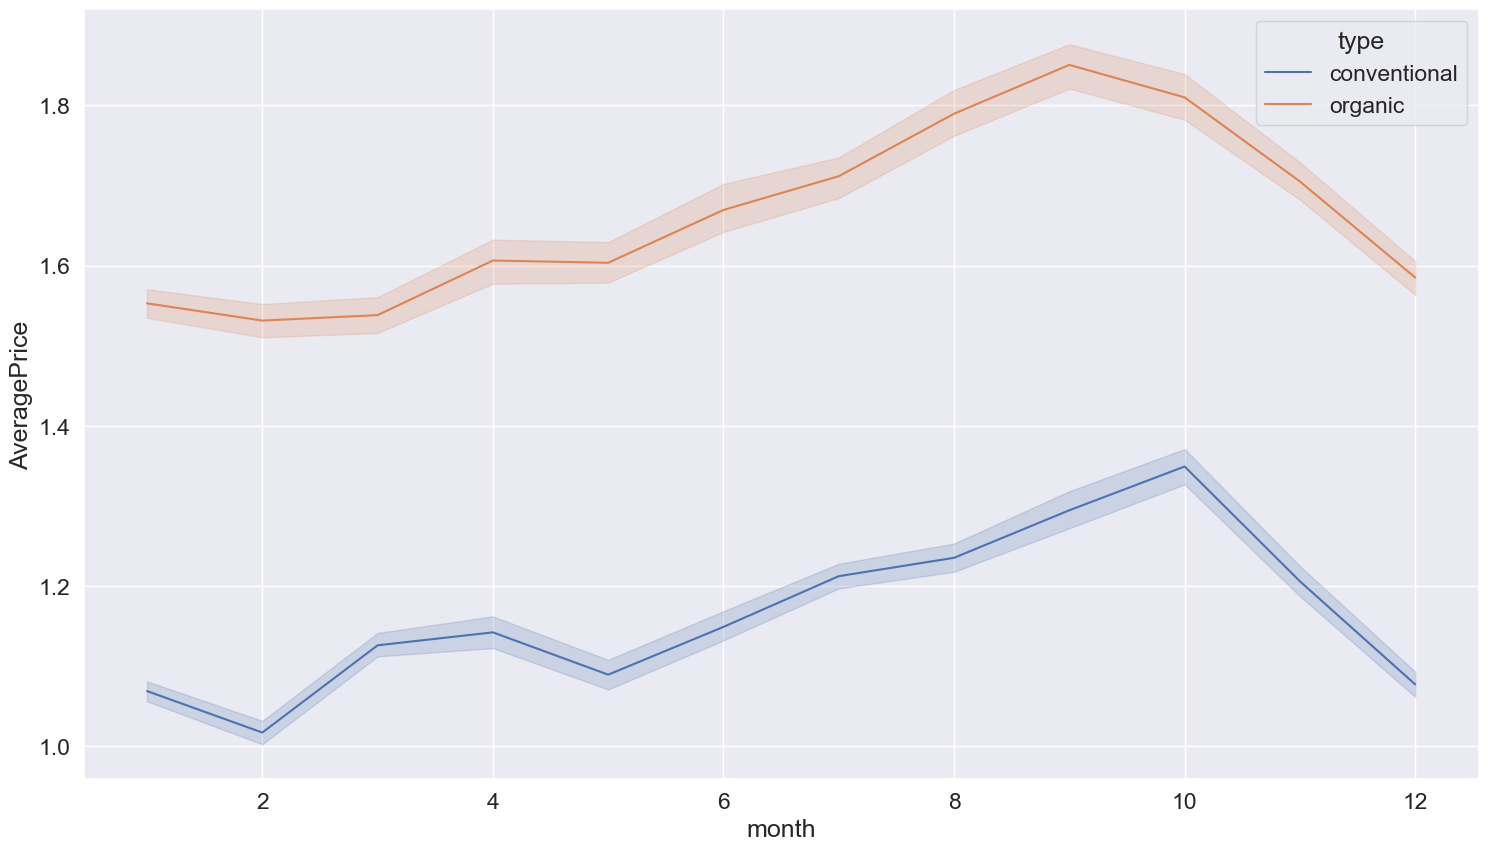

In [23]:
plt.figure(figsize=(18,10))
sns.lineplot(x="month", y="AveragePrice", hue='type', data=df)
plt.show()

- Looks like there was a __hike between months 8 – 10 for both Conventional and Organic type__ of Avocados prices

- __Q.4 What are TOP 5 regions where Average price are very high?__

In [24]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})

In [25]:
df1.reindex(df1.average_price.sort_values(ascending=False).index)

,region_list,average_price
17,HartfordSpringfield,1.818639
42,SanFrancisco,1.804201
28,NewYork,1.727574
32,Philadelphia,1.632130
40,Sacramento,1.621568
7,Charlotte,1.606036
29,Northeast,1.601923
0,Albany,1.561036
8,Chicago,1.556775
37,RaleighGreensboro,1.555118


Text(0.5, 1.0, 'Average Price of Avocado According to Region')

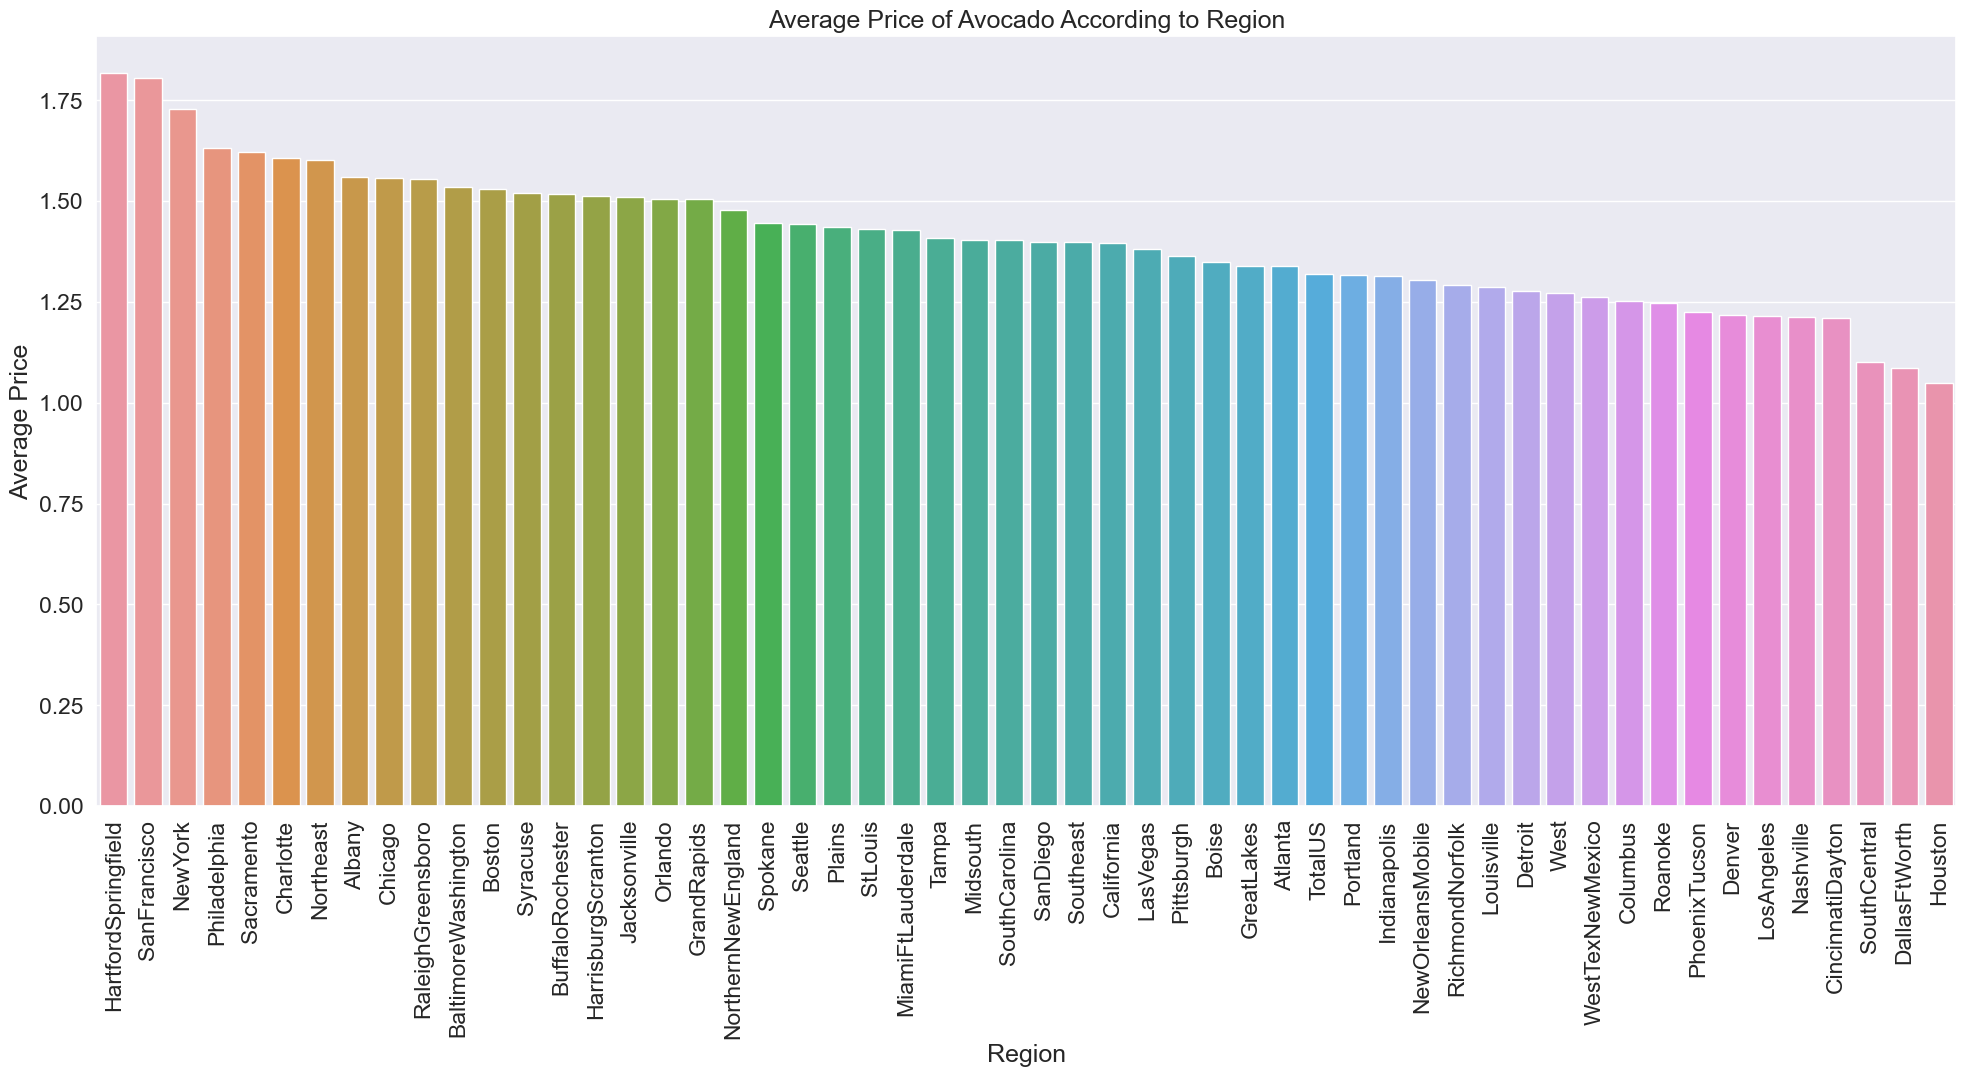

In [26]:
new_index=df1.average_price.sort_values(ascending=False).index
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

- The average price is high in HartfordSpringfield, SanFrancisco, NewYork, Philadelphia and Sacramento


- __Q.5 What are TOP 5 regions where Average consumption is very high?__

Text(0.5, 1.0, 'Average of Total Volume According to Region')

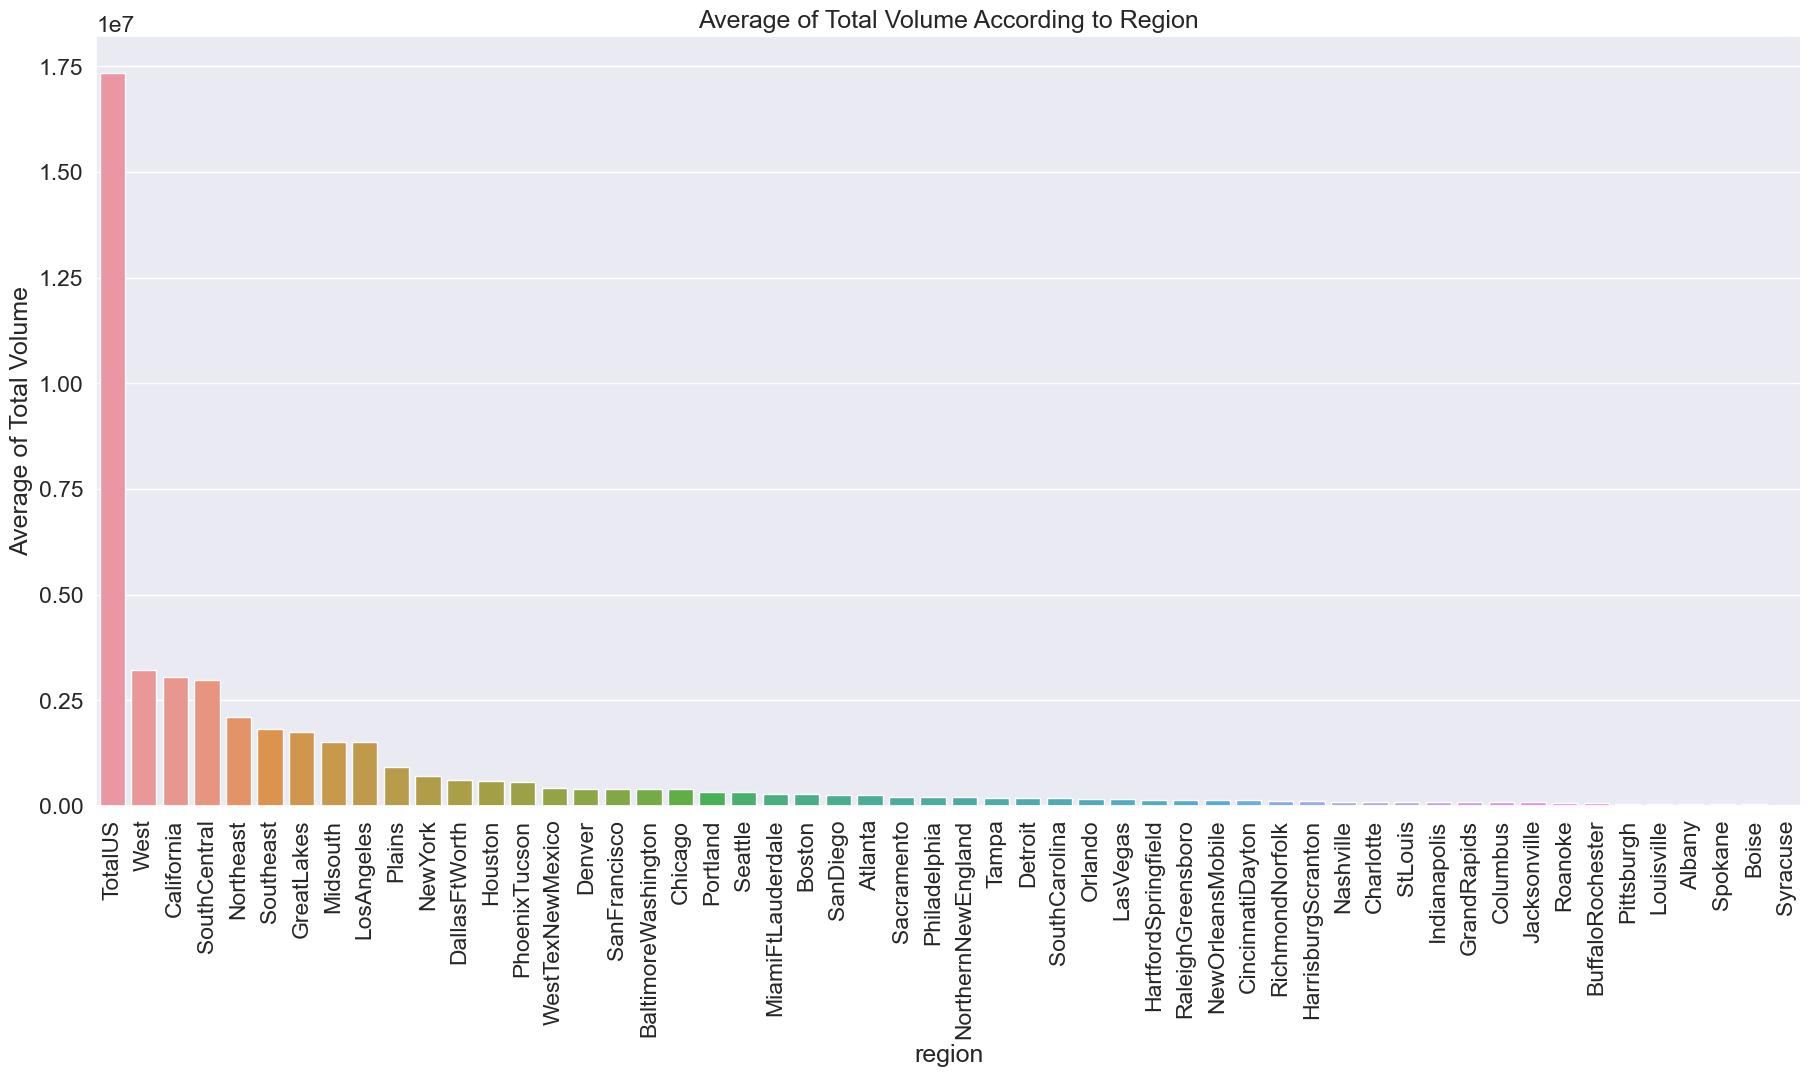

In [35]:
region_list=list(df.region.unique())
average_total_volume=[]

for i in region_list:
    x=df[df.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

- The average consumption is very high in West, California, SouthCentral, Northeast and Southeast


- __Q.6 How dataset features are correlated with each other?__

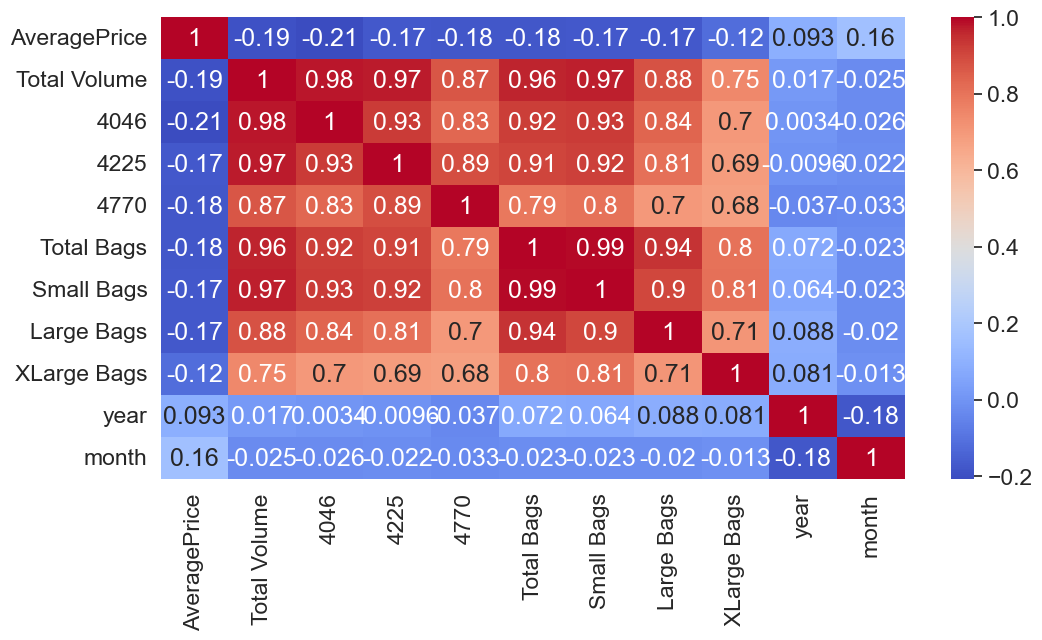

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

- From the heatmap we see that all the Features are not correleted with the Average Price column, instead most of them are correlated with each other


In [37]:
df_numeric_features = df.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'month'],
      dtype='object')

In [38]:
df_categoric_features = df.select_dtypes(include = object)

# display categorical features
df_categoric_features.columns

Index(['type', 'region'], dtype='object')

In [39]:
df_categoric_features

,type,region
0,conventional,Albany
1,conventional,Albany
2,conventional,Albany
3,conventional,Albany
4,conventional,Albany
...,...,...
18244,organic,WestTexNewMexico
18245,organic,WestTexNewMexico
18246,organic,WestTexNewMexico
18247,organic,WestTexNewMexico


In [40]:
# to create the dummy variables  we use 'get_dummies()' from pandas 
dummy_encoded_variables = pd.get_dummies(df_categoric_features,drop_first=True)
dummy_encoded_variables

,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<a id=section16></a>

In [41]:
# concatenate the numerical and dummy encoded categorical variables column-wise
df_avocado_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_avocado_dummy.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X = df_avocado_dummy.drop(['AveragePrice'],axis = 1)
y = df_avocado_dummy.AveragePrice

In [43]:
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,...,0,0,0,0,0,0,0,0,0,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,...,0,0,0,0,0,0,0,0,0,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,...,0,0,0,0,0,0,0,0,0,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,...,0,0,0,0,0,0,0,0,0,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,...,0,0,0,0,0,0,0,0,0,1
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,...,0,0,0,0,0,0,0,0,0,1
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,...,0,0,0,0,0,0,0,0,0,1
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,...,0,0,0,0,0,0,0,0,0,1


### * Split the data into train and test


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (14599, 64)
X_test  (3650, 64)
y_train  (14599,)
y_test  (3650,)


- Data Preprocessing 


In [45]:
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### * Linear Regression 

- Ordinary Least Square (OLS)

- Build the model

In [46]:
from sklearn.linear_model import LinearRegression #CFS
# build the model
OLS_model = LinearRegression()

# fit the model
OLS_model.fit(X_train, y_train)

LinearRegression()

- Predicting the values

In [47]:
# predict the values
y_pred_OLS = OLS_model.predict(X_test)

In [48]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_OLS))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_OLS))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_OLS)))

MAE: 648.7751534236722
MSE: 7919915.636533848
RMSE: 2814.2344672279614


### * Linear Regression using SGD

- Build the model

In [ ]:
from sklearn.linear_model import SGDRegressor

# build the model
SGD_model = SGDRegressor(loss="squared_error", alpha = 0.1, max_iter = 1000)

# fit the model
SGD_model.fit(X_train, y_train) #Training, SGD, Get optimal parameters

SGDRegressor(alpha=0.1)

In [ ]:
SGD_model.coef_ #all the weights, w1, w2, w3 ...

array([-1.81686439e-02, -2.39442901e-02, -1.23404971e-02, -1.10238640e-02,
       -1.48472525e-02, -1.38890132e-02, -1.55743889e-02, -3.43235558e-03,
        6.78726552e-02,  1.03896808e-01,  3.51795131e-01, -1.15403329e-02,
        2.04608640e-02, -6.19644484e-03,  1.71869734e-02,  1.60336796e-02,
       -1.90387596e-03,  3.07444795e-02,  2.45516124e-02, -3.09237016e-02,
       -2.37089793e-02, -5.10600476e-02, -2.63345132e-02, -2.06695724e-02,
        1.66267526e-02, -1.20127702e-02,  1.78822232e-02,  6.40366124e-02,
       -5.51720623e-02, -1.49363169e-02,  1.73310053e-02, -3.38664667e-03,
       -2.80631866e-02, -2.00347103e-02,  1.56417608e-03, -7.49183922e-05,
       -3.05292300e-02, -1.49316565e-02,  5.07802718e-02,  2.95291751e-02,
        1.24098539e-02,  1.60625124e-02,  3.49098686e-02, -3.01615478e-02,
       -6.07075579e-03,  3.65696184e-03, -1.56446712e-02,  2.49576748e-02,
       -1.81944661e-02, -2.57217506e-02,  3.33931854e-02, -3.09635658e-04,
        6.05697315e-02,  

In [ ]:
SGD_model.intercept_ #Bias w0

array([1.15379443])

- Predicting the values

In [ ]:
# predict the values
y_pred_SGD  = SGD_model.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_SGD))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_SGD))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_SGD)))

MAE: 0.23617198027657588
MSE: 0.09330462785125304
RMSE: 0.3054580623444944


### * RANDOM FOREST 

- Now we build a model using random forest regressor.

### Hyperparameter Tuning for Random Forest

In [49]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf_reg = RandomForestRegressor()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(rf_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model
accuracy = best_model.score(X_test, y_test)
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy: 0.8800506370049521


In [50]:
from sklearn.ensemble import RandomForestRegressor
#intantiate the regressor
rf_reg = RandomForestRegressor(random_state=42, max_depth = None, min_samples_leaf=1, min_samples_split=2, n_estimators= 300)

# fit the regressor with training dataset
# fit = training = creating 100 random DT's
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

- Predict the values

In [54]:
y_pred_rf = rf_reg.predict(X_test)

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

MAE: 0.10166828310502288
MSE: 0.01926438810867582
RMSE: 0.1387962107143989


- Well as we can see that RMSE of Random Forest model is lower than OLS and SGD models, so the RandomForest Regressor is the best model in this case.

## * Conclusions

- Libraries like matplotlib, Numpy, Pandas, seaborn and other libraries were used to develop better insights about the data.<br/>
- We did Data preprocessing which helped in dealing with missing values handling, feature scaling and dummy encoding the features
- The most important inference drawn from all this analysis is, we get to know what are the features on which price is highly positive and negative correlated
- We came to know through analysis that RANDOMFOREST model worked better in predicting the average avocado price
- This project helped me to gain insights and how we should approach the problem, hence attain results with good accuracy